# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Path to the saved data
training_file = "./traffic-signs-data/train.p"
validation_file= "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Debug option (True/False)
debug = True

In [3]:
# Print out some information of the data set
if debug:
    print("Shape of X_train is", X_train.shape)
    print("Shape of y_train is", y_train.shape)
    print("Shape of X_valid is", X_valid.shape)
    print("Shape of y_valid is", y_valid.shape)
    print("Shape of X_test is", X_test.shape)
    print("Shape of y_test is", y_test.shape)

Shape of X_train is (34799, 32, 32, 3)
Shape of y_train is (34799,)
Shape of X_valid is (4410, 32, 32, 3)
Shape of y_valid is (4410,)
Shape of X_test is (12630, 32, 32, 3)
Shape of y_test is (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [6]:
import numpy as np

In [7]:
# A function to plot the number of each label/class
# Save the figure for later use
def plot_number_of_each_label(labels, label_x, label_y, title, bar_color, savepath):
    values, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(16,4))
    plt.bar(values, counts, 0.8, color=bar_color)
    plt.ylabel(label_x)
    plt.xlabel(label_y)
    plt.title(title)
    plt.savefig(savepath)

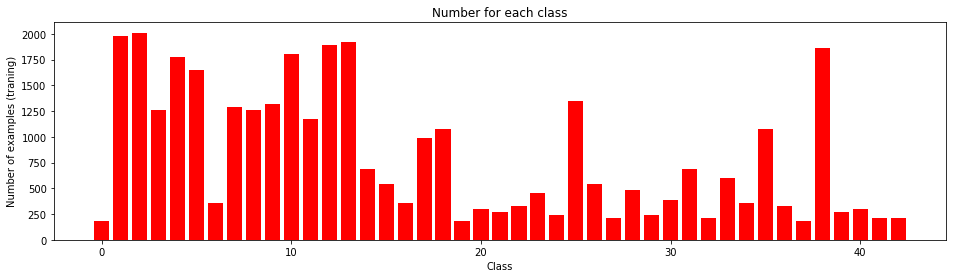

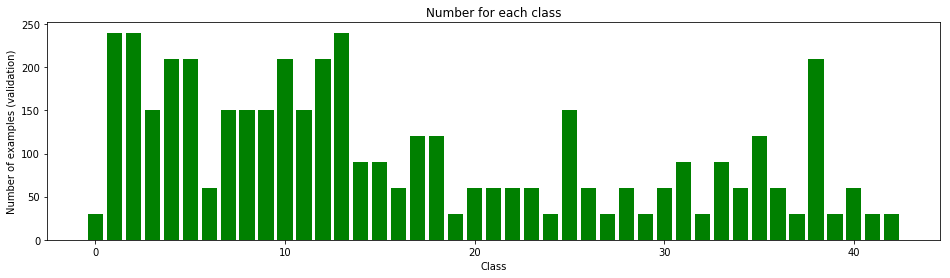

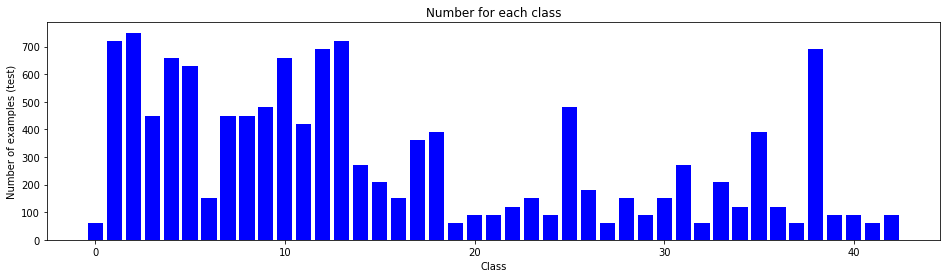

In [8]:
# Training data
savepath = 'output_images/train_data.jpg'
plot_number_of_each_label(y_train, 'Number of examples (traning)', 'Class', 'Number for each class', 'r', savepath)
# Validation data
savepath = 'output_images/valid_data.jpg'
plot_number_of_each_label(y_valid, 'Number of examples (validation)', 'Class', 'Number for each class', 'g', savepath)
# Test data
savepath = 'output_images/test_data.jpg'
plot_number_of_each_label(y_test, 'Number of examples (test)', 'Class', 'Number for each class', 'b', savepath)

In [9]:
# A function to plot multiples images in nRow x nCol table
def plot_images(nRow, nCol, images, titles, showGray, showAxis, figure_size, title_size, savepath):
    plt.figure(figsize=figure_size)
    index = 0
    for i in range(nRow):
        for j in range(nCol):
            if index < len(images):
                plt.subplot(nRow, nCol, index+1)
                if showGray:
                    plt.imshow(images[index], cmap='gray')
                else:
                    plt.imshow(images[index])
                if showAxis:
                    plt.axis('on')
                else:
                    plt.axis('off')
                plt.title(titles[index], fontsize=title_size)
            index = index + 1
    if savepath:
        plt.savefig(savepath)

In [10]:
# Read csv file to get the table including the sign/label with its description
import csv

table = {}
csv_file = open('signnames.csv', 'r')
for row in csv.reader(csv_file):
    label, description = row
    table[label] = description

In [11]:
# Get a random image for each sign/label
import random

image_list = []
title_list = []
showGray_list = []

for c in range(n_classes):
    random_index = random.choice(np.where(y_train == c)[0])
    image_list.append(X_train[random_index])
    title_list.append('label '+str(c)+': '+table[str(c)])
    showGray_list.append(False)

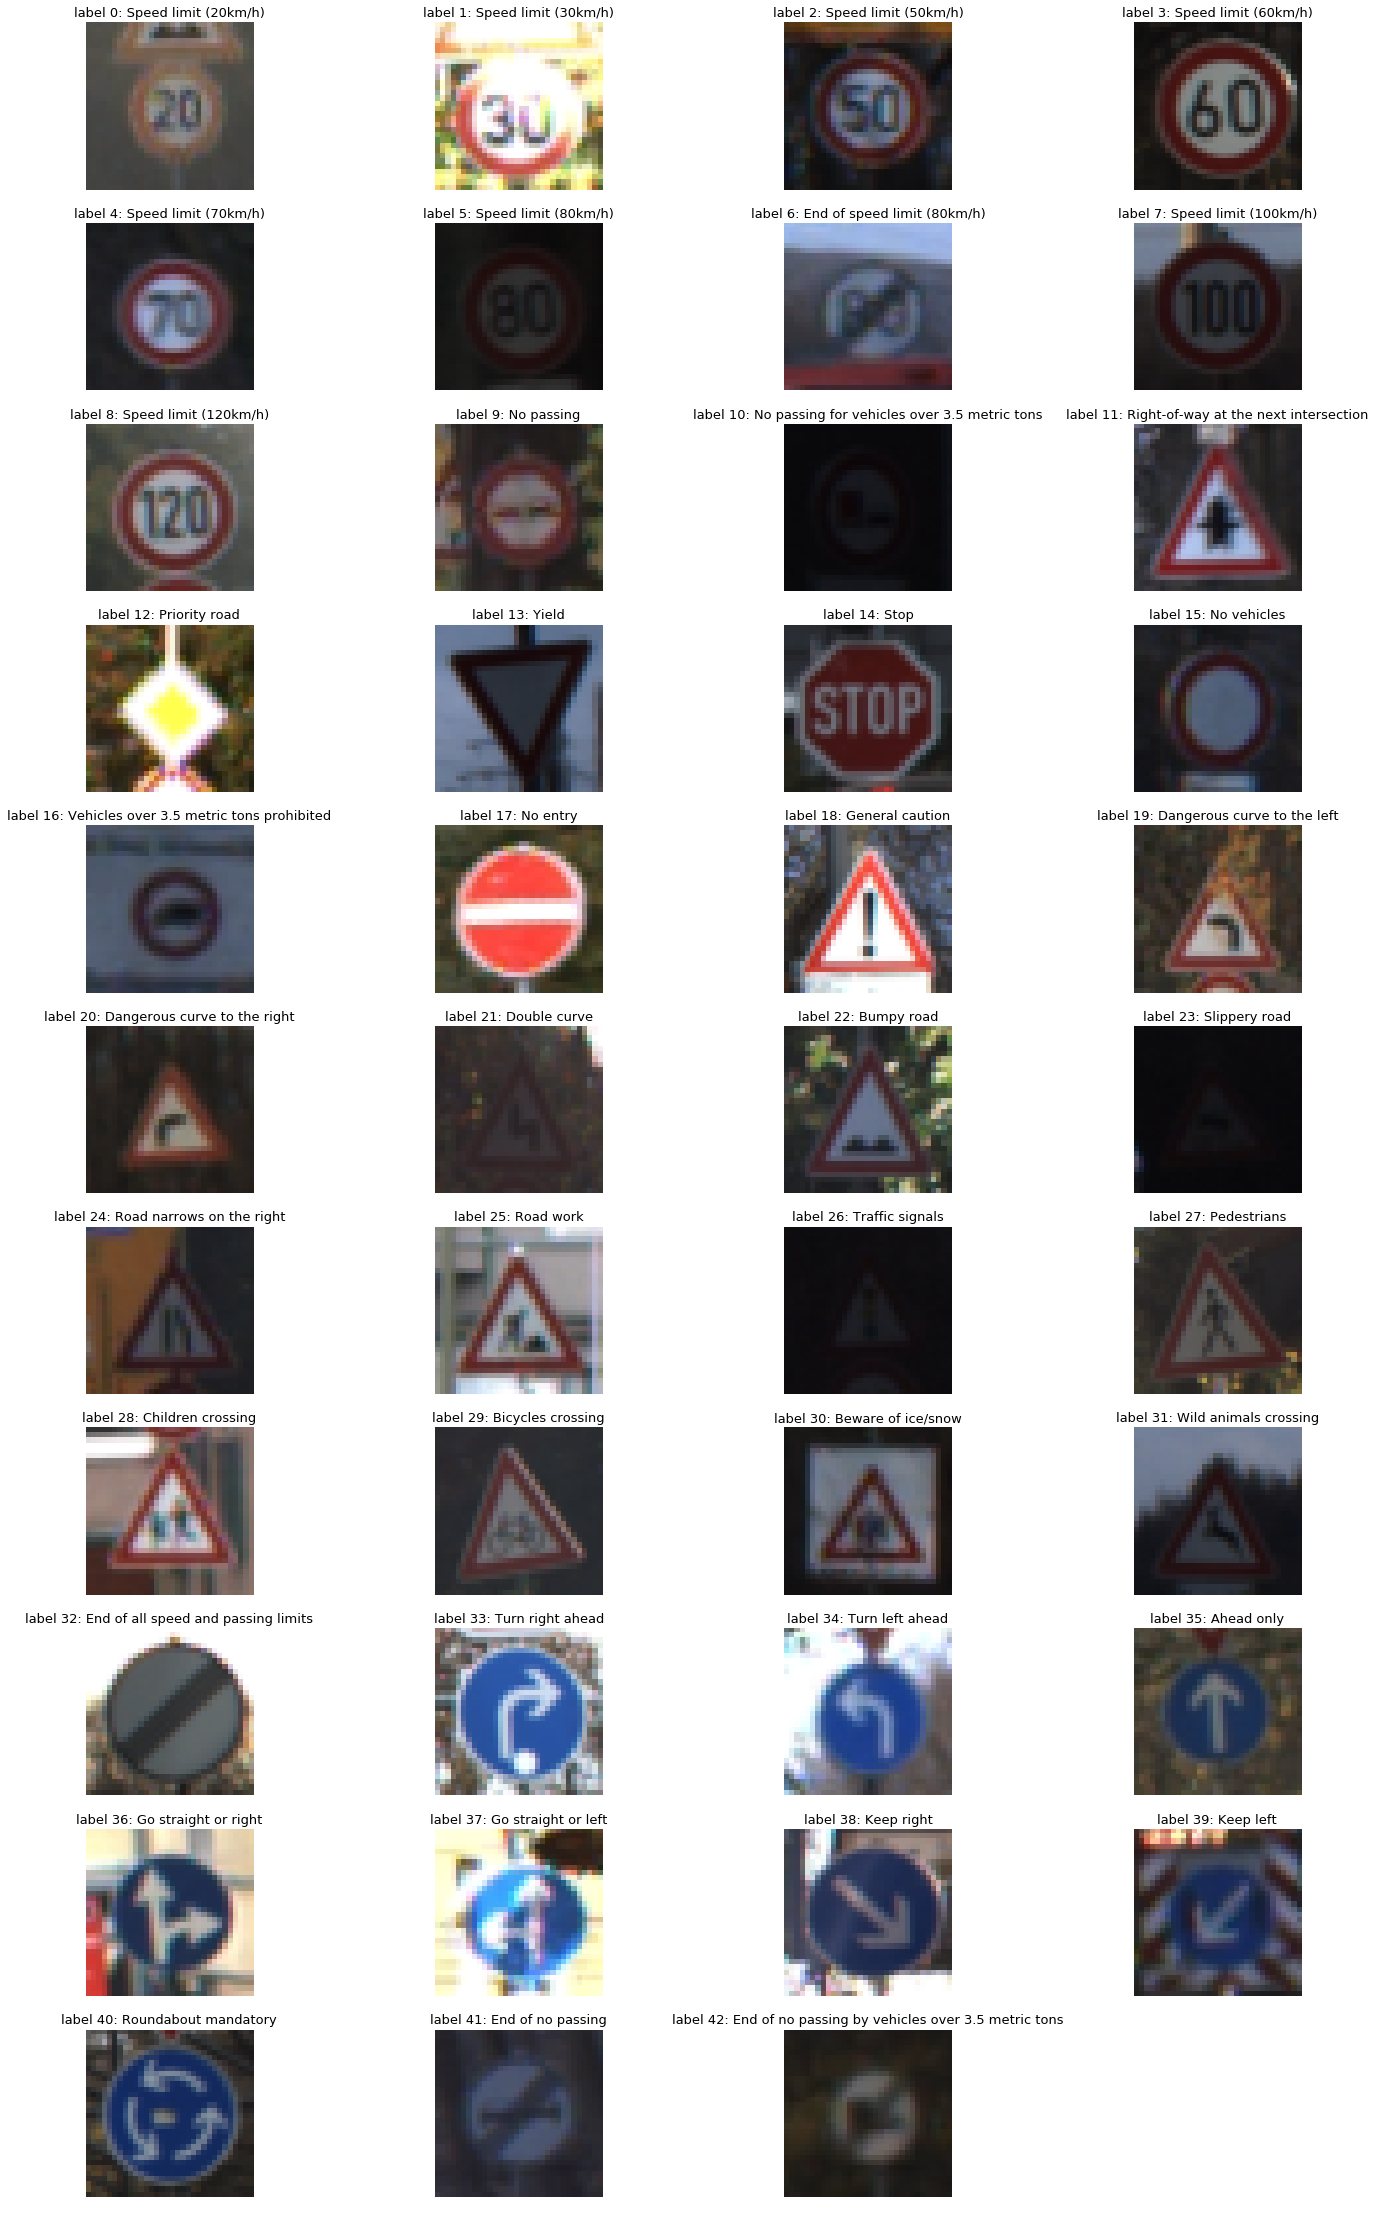

In [12]:
# Plot all random images for each label
path='output_images/all_labels.jpg'
plot_images(11, 4, image_list, title_list, showGray_list, showAxis=False, figure_size=(24,40), title_size=13, savepath=path)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [14]:
import cv2

In [15]:
# A function to normalize the image
def normalize_img(img):
    normalized_img = (img - 128)/128
    return normalized_img

# A function to apply Gaussian Blur smoothing to the image
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

In [48]:
# Default pre-process method
# Method 1 : Keep original (not process anything)
# Method 2 : Normalize
# Method 3 : Grayscale
# Method 4 : Gaussian Blur (kernel size = 3)
# Method 5 : Gaussian Blur (kernel size = 5)
preprocess_method = 4

# A function to pre-process the image
def preprocess(img, preprocess_method):
    if preprocess_method == 1:
        processed_img = img
    elif preprocess_method == 2:
        processed_img = normalize_img(img)
    elif preprocess_method == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        processed_img = np.dstack((gray, gray, gray))
    elif preprocess_method == 4:
        processed_img = gaussian_blur(img, kernel_size=3)
    elif preprocess_method == 5:
        processed_img = gaussian_blur(img, kernel_size=5)
    
    return processed_img

In [59]:
# A function to show preprocessed images of a specific image
def plot_preprocessed_images(img):
    processed_images = []
    processed_image_list = []
    showGray = []
    for preprocess_method in range(1,6):
        processed_img = preprocess(img, preprocess_method)
        processed_images.append(processed_img)
        processed_image_list.append('Method #' + str(preprocess_method))
        showGray.append(False)
        
    plot_images(1, 5, processed_images, processed_image_list, showGray, showAxis=True, figure_size=(14,14), title_size=16, savepath=None)

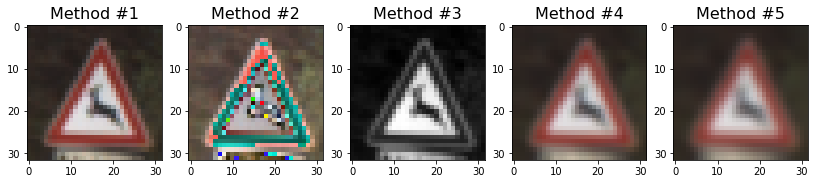

In [60]:
# Show preprocessed images of a specific index
plot_preprocessed_images(X_train[500])

In [17]:
# A pipeline to pre-process the datasets
def preprocess_pipeline(X_train, X_valid, X_test, preprocess_method):
    X_train_processed = np.copy(X_train)
    for i in range(0, len(X_train)):
        X_train_processed[i] = preprocess(X_train[i], preprocess_method)

    X_valid_processed = np.copy(X_valid)
    for i in range(0, len(X_valid)):
        X_valid_processed[i] = preprocess(X_valid[i], preprocess_method)

    X_test_processed = np.copy(X_test)
    for i in range(0, len(X_test)):
        X_test_processed[i] = preprocess(X_test[i], preprocess_method)
    
    return X_train_processed, X_valid_processed, X_test_processed

In [18]:
# Call the pre-process pipeline
preprocess_method = 4
X_train_processed_test, X_valid_processed_test, X_test_processed_test = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method)

### Model Architecture

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [20]:
from tensorflow.contrib.layers import flatten

In [21]:
# A simple model architecture based on LeNet model
def LeNet_1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [22]:
# A customized model architecture based on LeNet model
def LeNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 240. Output = 168.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(240, 168), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(168))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 168. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(168, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [23]:
# A customized model architecture based on LeNet model
def LeNet_3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x25.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 25), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(25))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x25. Output = 5x5x25.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x25. Output = 625.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 625. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(625, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 400. Output = 240.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 240), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(240))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 240. Output = 100.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(240, 100), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(100))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Activation.
    fc3    = tf.nn.relu(fc3)

    # Layer 6: Fully Connected. Input = 100. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [24]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [25]:
import tensorflow as tf
from sklearn.utils import shuffle

In [26]:
# A function to select the model architecture
def select_model(x, model_selection):
    if model_selection == 1:
        logits = LeNet_1(x)
    elif model_selection == 2:
        logits = LeNet_2(x)
    elif model_selection == 3:
        logits = LeNet_3(x)
    # TODO: Add the selection for more model here    
        
    return logits

In [27]:
# A function to evaluate the model after training
def evaluate_model(X_data, y_data, accuracy_operation, batch_size, x ,y):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [28]:
# Pipeline to train the model with specific parameters & datasets
def pipeline(model_selection, rate, num_epoch, batch_size, X_train, y_train, X_valid, y_valid, X_test, y_test):
    x = tf.placeholder(tf.float32, (None, 32, 32, 3))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, 43)

    logits = select_model(x, model_selection)

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()
    
    validation_accuracy = []

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Start training with below parameters:")
        print("Model #" + str(model_selection) + ", learning rate = " + str(rate) + ", number of epoch = " + str(num_epoch) + ", batch size = " + str(batch_size))
        print()
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for epoch_i in range(num_epoch):
            #X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy_epoch = evaluate_model(X_valid, y_valid, accuracy_operation, batch_size, x ,y)
            print("Epoch {} - Validation accuracy = {:.3f}".format(epoch_i+1, validation_accuracy_epoch))
            validation_accuracy.append(validation_accuracy_epoch)
        
        print()
        test_accuracy = evaluate_model(X_test, y_test, accuracy_operation, batch_size, x ,y)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
        savepath = 'model' + str(model_selection) + '_rate' + str(rate) + '_epoch' + str(num_epoch) + '_batch' + str(batch_size) + '.ckpt'
        
        saver.save(sess, './trained_data/' + savepath)
        print("Saved model to ./trained_data/" + savepath)
        print("-----------")
        print()
        
        return validation_accuracy, test_accuracy

In [41]:
# A function to plot the training results for easy comparison
def plot_training_results(results, labels, savepath):
    plt.figure(figsize=(16,10))
    
    x_max = len(results[0])
    x_data = []
    for x in range(x_max):
        x_data.append(x+1) 
            
    for i in range(len(results)):
        plt.plot(x_data, results[i] , label=labels[i])
        
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation accuracy on each epoch') 
    plt.xticks(range(1, x_max + 1, 1))
    plt.legend()
   
    if savepath:
        plt.savefig(savepath)
    
    plt.show()

In [31]:
# Training with different models
models = [1, 2, 3]
preprocess_method = 4
valid_accuracy_model = []
labels_model = []
for model in models:
    X_train_processed, X_valid_processed, X_test_processed = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(model, 0.001, 25, 64, X_train_processed, y_train, X_valid_processed, y_valid,  X_test_processed, y_test)
    valid_accuracy_model.append(valid_accuracy_tmp)
    labels_model.append('Model = ' + str(model))

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 25, batch size = 64

Epoch 1 - Validation accuracy = 0.687
Epoch 2 - Validation accuracy = 0.787
Epoch 3 - Validation accuracy = 0.836
Epoch 4 - Validation accuracy = 0.840
Epoch 5 - Validation accuracy = 0.850
Epoch 6 - Validation accuracy = 0.872
Epoch 7 - Validation accuracy = 0.873
Epoch 8 - Validation accuracy = 0.870
Epoch 9 - Validation accuracy = 0.876
Epoch 10 - Validation accuracy = 0.885
Epoch 11 - Validation accuracy = 0.904
Epoch 12 - Validation accuracy = 0.888
Epoch 13 - Validation accuracy = 0.893
Epoch 14 - Validation accuracy = 0.903
Epoch 15 - Validation accuracy = 0.903
Epoch 16 - Validation accuracy = 0.920
Epoch 17 - Validation accuracy = 0.902
Epoch 18 - Validation accuracy = 0.898
Epoch 19 - Validation accuracy = 0.911
Epoch 20 - Validation accuracy = 0.913
Epoch 21 - Validation accuracy = 0.872
Epoch 22 - Validation accuracy = 0.925
Epoch 23 - Validation accuracy = 0.878
Ep

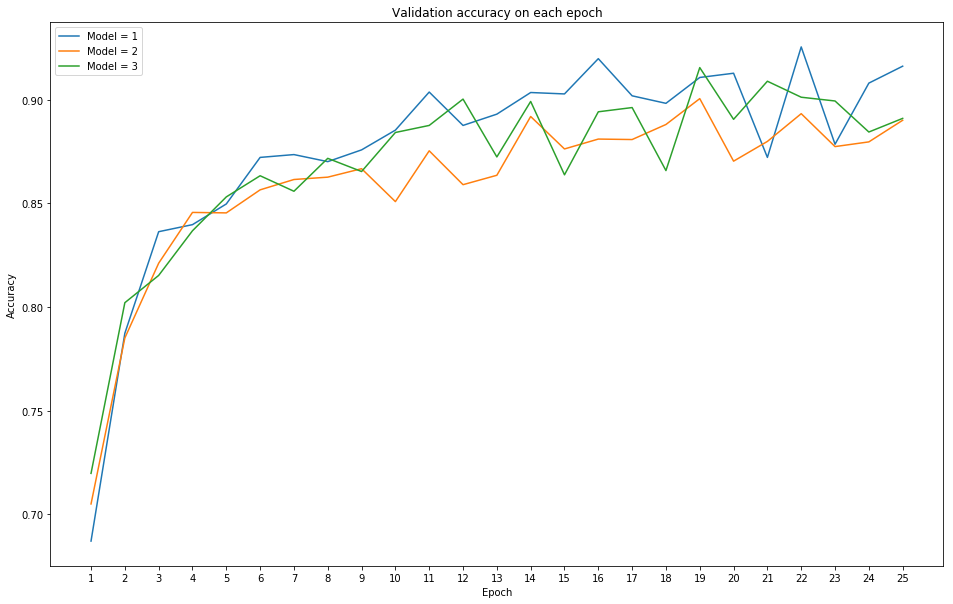

In [43]:
# Show training results
savepath = './output_images/valid_acc_with_different_model.jpg'
plot_training_results(valid_accuracy_model, labels_model, savepath)

In [33]:
# Tuning with different learning rate
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03]
preprocess_method = 4
valid_accuracy_rate = []
labels_rate = []
for rate in learning_rates:
    X_train_processed, X_valid_processed, X_test_processed = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(1, rate, 15, 128, X_train_processed, y_train, X_valid_processed, y_valid,  X_test_processed, y_test)
    valid_accuracy_rate.append(valid_accuracy_tmp)
    labels_rate.append('Learning rate = ' + str(rate))

Start training with below parameters:
Model #1, learning rate = 0.0001, number of epoch = 15, batch size = 128

Epoch 1 - Validation accuracy = 0.207
Epoch 2 - Validation accuracy = 0.371
Epoch 3 - Validation accuracy = 0.484
Epoch 4 - Validation accuracy = 0.577
Epoch 5 - Validation accuracy = 0.646
Epoch 6 - Validation accuracy = 0.690
Epoch 7 - Validation accuracy = 0.724
Epoch 8 - Validation accuracy = 0.742
Epoch 9 - Validation accuracy = 0.762
Epoch 10 - Validation accuracy = 0.771
Epoch 11 - Validation accuracy = 0.780
Epoch 12 - Validation accuracy = 0.787
Epoch 13 - Validation accuracy = 0.797
Epoch 14 - Validation accuracy = 0.803
Epoch 15 - Validation accuracy = 0.807

Test Accuracy = 0.801

Saved model to ./trained_data/model1_rate0.0001_epoch15_batch128.ckpt
-----------

Start training with below parameters:
Model #1, learning rate = 0.0003, number of epoch = 15, batch size = 128

Epoch 1 - Validation accuracy = 0.403
Epoch 2 - Validation accuracy = 0.572
Epoch 3 - Validat

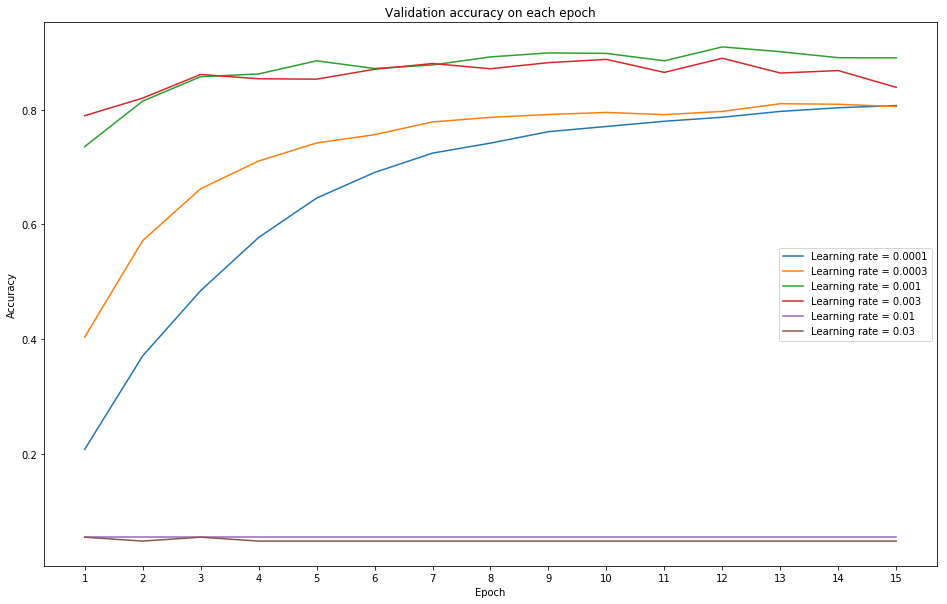

In [44]:
# Show training results
savepath = './output_images/valid_acc_with_different_rate.jpg'
plot_training_results(valid_accuracy_rate, labels_rate, savepath)

In [35]:
# Tuning with different batch size
batch_sizes = [32, 64, 96, 128, 160, 192]
preprocess_method = 4
valid_accuracy_batch = []
labels_batch = []
for batch_size in batch_sizes:
    X_train_processed, X_valid_processed, X_test_processed = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(1, 0.001, 10, batch_size, X_train_processed, y_train, X_valid_processed, y_valid,  X_test_processed, y_test)
    valid_accuracy_batch.append(valid_accuracy_tmp)
    labels_batch.append('Batch size = ' + str(batch_size))

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 10, batch size = 32

Epoch 1 - Validation accuracy = 0.839
Epoch 2 - Validation accuracy = 0.872
Epoch 3 - Validation accuracy = 0.870
Epoch 4 - Validation accuracy = 0.890
Epoch 5 - Validation accuracy = 0.894
Epoch 6 - Validation accuracy = 0.878
Epoch 7 - Validation accuracy = 0.888
Epoch 8 - Validation accuracy = 0.895
Epoch 9 - Validation accuracy = 0.891
Epoch 10 - Validation accuracy = 0.893

Test Accuracy = 0.890

Saved model to ./trained_data/model1_rate0.001_epoch10_batch32.ckpt
-----------

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 10, batch size = 64

Epoch 1 - Validation accuracy = 0.754
Epoch 2 - Validation accuracy = 0.852
Epoch 3 - Validation accuracy = 0.848
Epoch 4 - Validation accuracy = 0.868
Epoch 5 - Validation accuracy = 0.868
Epoch 6 - Validation accuracy = 0.861
Epoch 7 - Validation accuracy = 0.885
Epoch 8 - Validation accurac

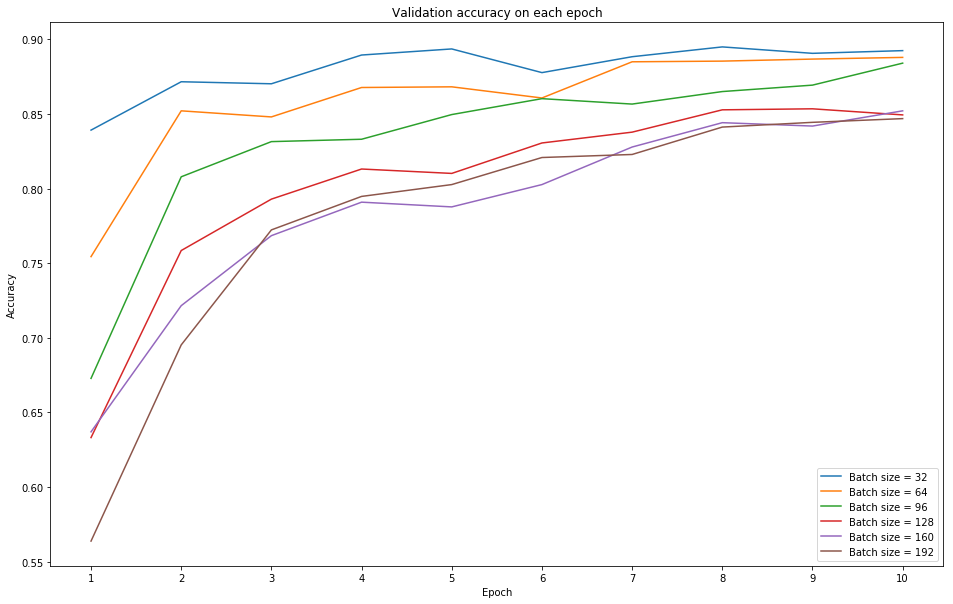

In [45]:
# Show training results
savepath = './output_images/valid_acc_with_different_batchsize.jpg'
plot_training_results(valid_accuracy_batch, labels_batch, savepath)

In [46]:
# Training with different models (with batch_size = 32)
models = [1, 2, 3]
preprocess_method = 4
valid_accuracy_model_b32 = []
labels_model_b32 = []
for model in models:
    X_train_processed, X_valid_processed, X_test_processed = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(model, 0.001, 25, 32, X_train_processed, y_train, X_valid_processed, y_valid,  X_test_processed, y_test)
    valid_accuracy_model_b32.append(valid_accuracy_tmp)
    labels_model_b32.append('Model LeNet_' + str(model))

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 25, batch size = 32

Epoch 1 - Validation accuracy = 0.750
Epoch 2 - Validation accuracy = 0.829
Epoch 3 - Validation accuracy = 0.857
Epoch 4 - Validation accuracy = 0.865
Epoch 5 - Validation accuracy = 0.864
Epoch 6 - Validation accuracy = 0.864
Epoch 7 - Validation accuracy = 0.862
Epoch 8 - Validation accuracy = 0.872
Epoch 9 - Validation accuracy = 0.870
Epoch 10 - Validation accuracy = 0.883
Epoch 11 - Validation accuracy = 0.919
Epoch 12 - Validation accuracy = 0.866
Epoch 13 - Validation accuracy = 0.869
Epoch 14 - Validation accuracy = 0.911
Epoch 15 - Validation accuracy = 0.881
Epoch 16 - Validation accuracy = 0.897
Epoch 17 - Validation accuracy = 0.893
Epoch 18 - Validation accuracy = 0.900
Epoch 19 - Validation accuracy = 0.899
Epoch 20 - Validation accuracy = 0.886
Epoch 21 - Validation accuracy = 0.900
Epoch 22 - Validation accuracy = 0.857
Epoch 23 - Validation accuracy = 0.883
Ep

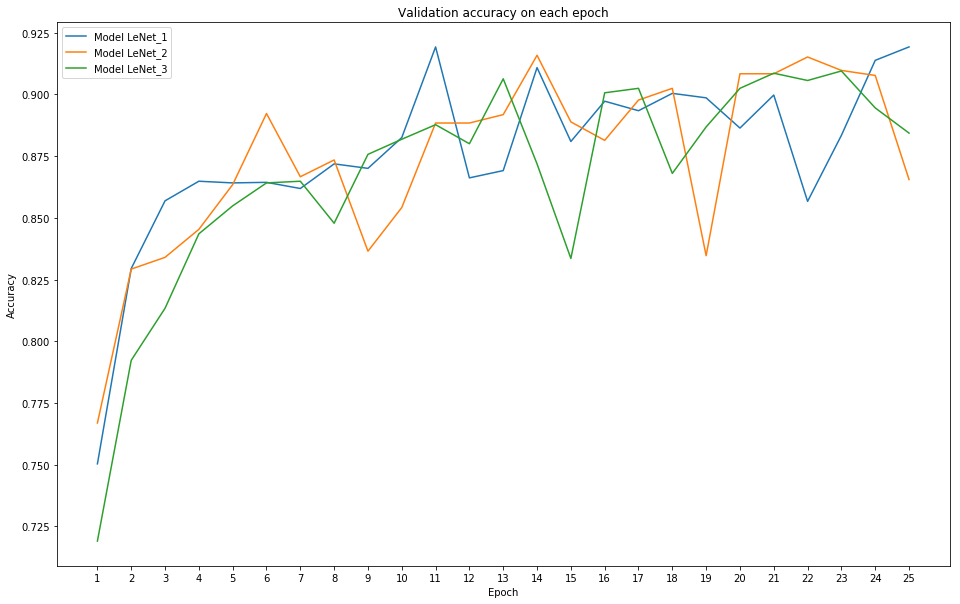

In [47]:
# Show training results
savepath = './output_images/valid_acc_with_different_model_b32.jpg'
plot_training_results(valid_accuracy_model_b32, labels_model_b32, savepath)

In [49]:
# Merge training data
def merge_data(X_train_1, X_train_2, y):
    X_train_merged = []
    y_train_merged = []
    for i in range(len(X_train_1)):
        X_train_merged.append(X_train_1[i])
        y_train_merged.append(y[i])
    for i in range(len(X_train_2)):
        X_train_merged.append(X_train_2[i])
        y_train_merged.append(y[i])
    
    return X_train_merged, y_train_merged

In [50]:
# Training with different model (using more training data)
models = [1, 2, 3]
valid_accuracy_model_moredata = []
labels_model_moredata = []

for model in models:
    X_train_processed_1, X_valid_processed_1, X_test_processed_1 = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method = 4)
    X_train_processed_2, X_valid_processed_2, X_test_processed_2 = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method = 5)
    X_train_merged, y_train_merged = merge_data(X_train_processed_1, X_train_processed_2, y_train)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(model, 0.001, 25, 64, X_train_merged, y_train_merged, X_valid_processed_1, y_valid,  X_test_processed_1, y_test)
    valid_accuracy_model_moredata.append(valid_accuracy_tmp)
    labels_model_moredata.append('Model LeNet_' + str(model))

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 25, batch size = 64

Epoch 1 - Validation accuracy = 0.845
Epoch 2 - Validation accuracy = 0.878
Epoch 3 - Validation accuracy = 0.888
Epoch 4 - Validation accuracy = 0.883
Epoch 5 - Validation accuracy = 0.887
Epoch 6 - Validation accuracy = 0.903
Epoch 7 - Validation accuracy = 0.886
Epoch 8 - Validation accuracy = 0.891
Epoch 9 - Validation accuracy = 0.894
Epoch 10 - Validation accuracy = 0.900
Epoch 11 - Validation accuracy = 0.896
Epoch 12 - Validation accuracy = 0.906
Epoch 13 - Validation accuracy = 0.888
Epoch 14 - Validation accuracy = 0.895
Epoch 15 - Validation accuracy = 0.891
Epoch 16 - Validation accuracy = 0.900
Epoch 17 - Validation accuracy = 0.873
Epoch 18 - Validation accuracy = 0.900
Epoch 19 - Validation accuracy = 0.907
Epoch 20 - Validation accuracy = 0.904
Epoch 21 - Validation accuracy = 0.907
Epoch 22 - Validation accuracy = 0.898
Epoch 23 - Validation accuracy = 0.890
Ep

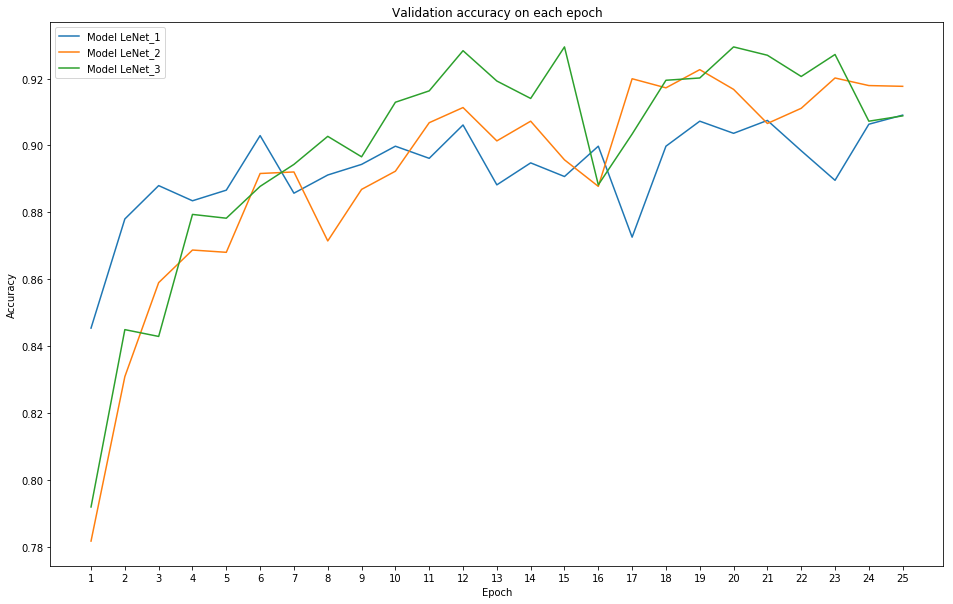

In [52]:
# Show training results
savepath = './output_images/valid_acc_with_different_model_b64_moredata.jpg'
plot_training_results(valid_accuracy_model_moredata, labels_model_moredata, savepath)

In [53]:
# Training with different model (using more training data & batch size = 32)
models = [1, 2, 3]
valid_accuracy_model_moredata_b32 = []
labels_model_moredata_b32 = []

for model in models:
    X_train_processed_1, X_valid_processed_1, X_test_processed_1 = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method = 4)
    X_train_processed_2, X_valid_processed_2, X_test_processed_2 = preprocess_pipeline(X_train, X_valid, X_test, preprocess_method = 5)
    X_train_merged, y_train_merged = merge_data(X_train_processed_1, X_train_processed_2, y_train)
    valid_accuracy_tmp, test_accuracy_tmp = pipeline(model, 0.001, 25, 32, X_train_merged, y_train_merged, X_valid_processed_1, y_valid,  X_test_processed_1, y_test)
    valid_accuracy_model_moredata_b32.append(valid_accuracy_tmp)
    labels_model_moredata_b32.append('Model LeNet_' + str(model))

Start training with below parameters:
Model #1, learning rate = 0.001, number of epoch = 25, batch size = 32

Epoch 1 - Validation accuracy = 0.815
Epoch 2 - Validation accuracy = 0.868
Epoch 3 - Validation accuracy = 0.883
Epoch 4 - Validation accuracy = 0.909
Epoch 5 - Validation accuracy = 0.888
Epoch 6 - Validation accuracy = 0.883
Epoch 7 - Validation accuracy = 0.909
Epoch 8 - Validation accuracy = 0.912
Epoch 9 - Validation accuracy = 0.891
Epoch 10 - Validation accuracy = 0.911
Epoch 11 - Validation accuracy = 0.906
Epoch 12 - Validation accuracy = 0.934
Epoch 13 - Validation accuracy = 0.914
Epoch 14 - Validation accuracy = 0.903
Epoch 15 - Validation accuracy = 0.908
Epoch 16 - Validation accuracy = 0.918
Epoch 17 - Validation accuracy = 0.918
Epoch 18 - Validation accuracy = 0.925
Epoch 19 - Validation accuracy = 0.883
Epoch 20 - Validation accuracy = 0.908
Epoch 21 - Validation accuracy = 0.914
Epoch 22 - Validation accuracy = 0.917
Epoch 23 - Validation accuracy = 0.932
Ep

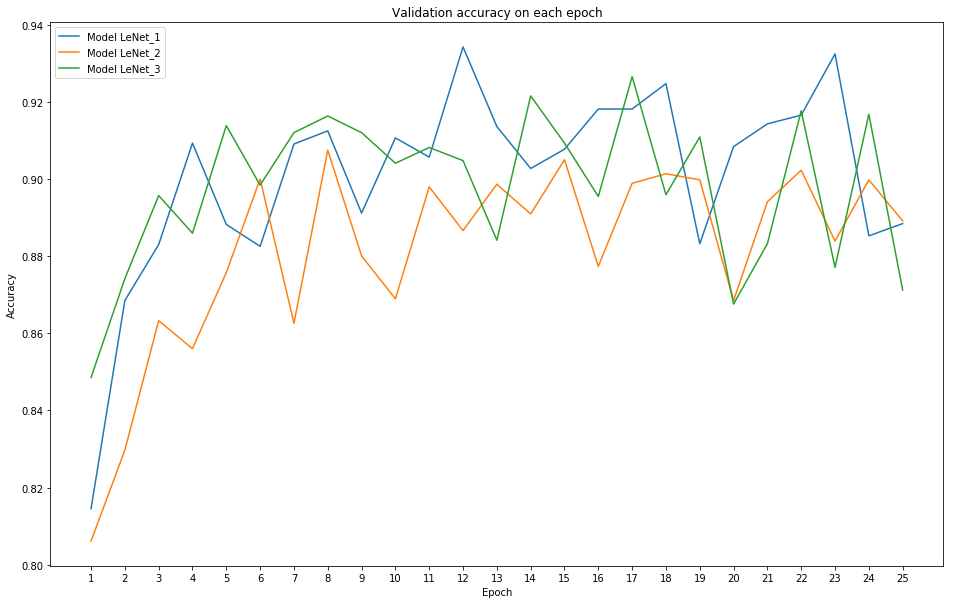

In [54]:
# Show training results
savepath = './output_images/valid_acc_with_different_model_b32_moredata.jpg'
plot_training_results(valid_accuracy_model_moredata_b32, labels_model_moredata_b32, savepath)

### Load and Output the Images

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [29]:
import matplotlib.image as mpimg

In [30]:
# Old list (including image with different size)
# image_list = ['00001.ppm', '00002.ppm', '00003.ppm', '00004.ppm', '00005.ppm']
# New list (including only image with size 32x32x3)
image_list = ['00001.ppm', '00013.ppm', '00090.ppm', '00115.ppm', '00184.ppm']

In [31]:
images = []
showGray = []

for filename in image_list:
    img = mpimg.imread('test_images/'+filename)
    images.append(img)
    showGray.append(False)

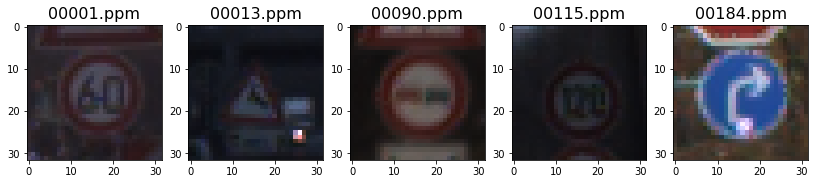

In [32]:
plot_images(1, 5, images, image_list, showGray, showAxis=True, figure_size=(14,14), title_size=16, savepath=None)

### Predict the Sign Type for Each Image

In [33]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [34]:
# Pre-process the new test images
preprocessed_images = []

for img in images:
    pre_processed_image = preprocess(img, preprocess_method)
    preprocessed_images.append(pre_processed_image)

In [36]:
# Output the prediction for each test image
# Correct label : [3 31 9 6 33]
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './training_pipeline.ckpt')
    predicted_label = sess.run(tf.argmax(logits, 1), feed_dict={x: preprocessed_images})
    print(predicted_label)

NameError: name 'logits' is not defined

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [ ]:
# Show the softmax probabilities for each image
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './lenet')
    softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: preprocessed_images})
    print(softmax)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [ ]:
# Top 5 softmax probabilities
with tf.Session() as sess:     
    saver = tf.train.Saver()
    saver.restore(sess, './lenet')
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits),5), feed_dict={x: preprocessed_images})
    print(top5)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")